# Exercise sheet 12
## Exercise 1 - Uncorrelated cafe waiting times

---

Go back to the cafe visits simulation from today’s lecture. Imagine that you repeat the experiment in a neighbourhood with no correlation between morning and afternoon waiting times. Assuming that you had no previous knowledge of this information, how can you identify the absence of correlation from the model fit results?

---

We measure the waiting time in the morning and in the afternoon. In the lecture, we considered the case where there was a trend that the afternoon had lower waiting times than the morning. As such, the morning and afternoon waiting times were correlated. We therefore measured the slope between the waiting times and observed that its mean is negative, confirming our observations. If we were to repeat the experiment in the uncorrelated neighbourhood, we would find a slope of around zero.

## Exercise 2 - Multi-level exoplanets

---

For this exercise, you will need to load the dataset exoplanets from the following github repository: https://github.com/bodemory/ASMP. This is a CSV file that needs to be loaded into R and converted into a dataframe as seen in the course and previous exercise sheets. All columns are described in the file header. This week’s dataset is an excerpt from the NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech. edu/index.html) that includes selected parameters about 185 exoplanets. Remarkably, all these planets “transit” their own star as seen from the Earth, enabling constraints on their size. The goal of this exercise is to investigate the density distribution of exoplanets across a range of masses:

---

In [5]:
library(rethinking)
exoplanets <- read.csv("D:\\Users\\Immanuel\\Documents\\_Programming\\my_r\\advanced_statistics\\exercise_sheet_12\\ASMP\\exoplanets.csv")
exoplanets

pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_radj,pl_dens,st_dist,gaia_gmag,st_teff,st_mass,st_rad
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WTS-1 b,Transit,1,3.352057,0.04700,0.1000,85.50,4.01000,1.490,1.610,3200.00,16.430,6250,1.20,1.15
WASP-89 b,Transit,1,3.356423,0.04270,0.1930,89.40,5.90000,1.040,7.000,293.38,12.989,5130,0.92,0.88
WASP-81 b,Transit,1,2.716476,0.03908,0.0660,88.69,0.72900,1.429,0.332,402.96,12.333,5870,1.08,1.28
WASP-80 b,Transit,1,3.067852,0.03440,0.0020,89.02,0.53800,0.999,0.717,60.00,11.273,4143,0.58,0.59
WASP-59 b,Transit,1,7.919585,0.06970,0.1000,89.27,0.86300,0.775,2.400,125.00,12.314,4650,0.72,0.61
WASP-53 b,Transit,2,3.309844,0.04101,0.0300,87.08,2.13200,1.074,2.280,202.51,12.347,4953,0.84,0.80
WASP-5 b,Transit,1,1.628428,0.02670,0.0380,86.90,1.58000,1.087,1.640,300.00,11.996,5700,0.96,1.03
WASP-19 b,Transit,1,0.788839,0.01634,0.0020,78.78,1.06900,1.392,0.492,250.00,12.109,5568,0.90,1.00
WASP-162 b,Transit,1,9.624680,0.08710,0.4340,89.30,5.20000,1.000,6.900,313.60,12.065,5300,0.95,1.11


---

Design a model to answer the following (initially vague) science question: “how is the planet density evolving with planet mass”? Narrow the scope of the science question if needed. The dataset includes planets with masses ranging from sub-Earth to several times the one of Jupiter. Start by fitting a linear model to the overall population. What are your findings? Is there any over-dispersion in the data? Work from this simple model to improve your results.

---

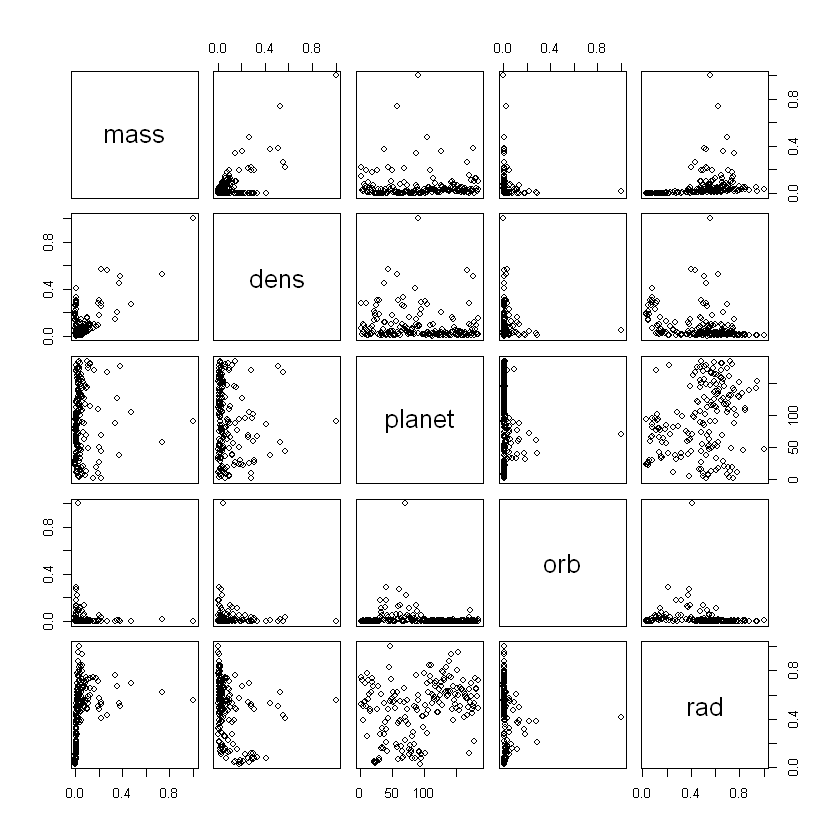

In [14]:
d <- data.frame(list(mass = exoplanets$pl_bmassj, dens = exoplanets$pl_dens))

d$planet <- c(1:nrow(d))
d$mass <- d$mass / max(d$mass)
d$dens <- d$dens / max(d$dens)
d$orb <- exoplanets$pl_orbper / max(exoplanets$pl_orbper)
d$rad <- exoplanets$pl_radj / max(exoplanets$pl_radj)

pairs(d)

In [3]:
# Model considering mass influencing density
model1 <- map2stan(
	alist(
		dens ~ dnorm(mu, sigma),
		mu <- off + off_planet[planet] + slope_mass * mass,
		off ~ dnorm(0, 1),
		off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		a_planet ~ dnorm(0, 1),
		sigma_planet ~ dcauchy(0, 1),
		slope_mass ~ dnorm(0, 1),
		sigma ~ dunif(0, 1)
	),
	data = d, iter = 4000, chains = 12, cores = 12
)

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c15394e02.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c15394e02.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c15394e02

Running MCMC with 12 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c15394e02.stan', line 23, column 4 to column 51)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c15394e02.stan', line 23, column 4 to column 51)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c15394e02.stan', line 23, column 4 to column 51)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c15394e02.stan', line 23, column 4 to column 51)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 1 Iteration:  900 / 4000 [ 22%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteratio

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"There were 737 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

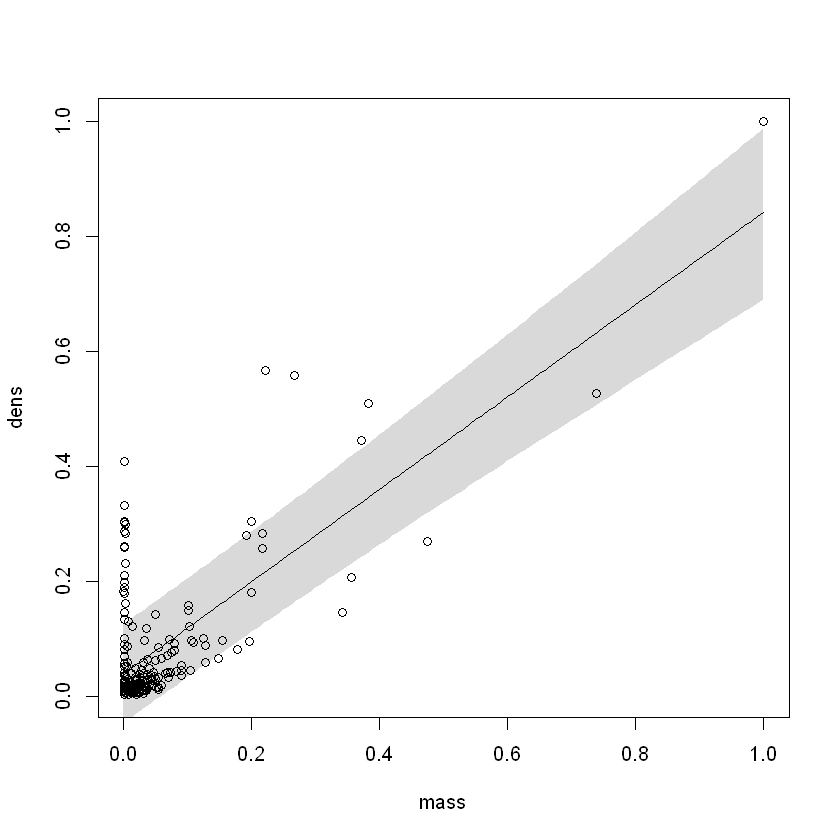

In [4]:
mass_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ mass, data = d, xlab = "mass", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model1, data = list(mass = mass_seq, planet = planet))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(mass_seq, mu.mean)
shade(mu.HPDI, mass_seq)

There obviously is over-dispersion in the data, as there is a lot of data for low masses and a lot for big masses.

---

The exoplanets dataset includes numerous variables that could be used as predictors. Try adding the planet orbital period in your multi-level model. Do you achieve better estimates than above? Amongst the other variables, justify the choice of another predictor that could be relevant to predict planet density from planet mass.

---

In [9]:
# Model with mass and orbit duration
model2 <- map2stan(
	alist(
		dens ~ dnorm(mu, sigma),
		mu <- off + off_planet[planet] + slope_mass * mass + slope_orb * orb,
		off ~ dnorm(0, 1),
		off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		a_planet ~ dnorm(0, 1),
		sigma_planet ~ dcauchy(0, 1),
		slope_mass ~ dnorm(0, 1),
		slope_orb ~ dnorm(0, 1),
		sigma ~ dunif(0, 1)
	),
	data = d, iter = 4000, chains = 12, cores = 12
)

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3

Running MCMC with 12 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3.stan', line 26, column 4 to column 51)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3.stan', line 26, column 4 to column 51)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3.stan', line 26, column 4 to column 51)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3.stan', line 26, column 4 to column 51)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 



Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c189653d3.stan', line 26, column 4 to column 51)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteration:  900 / 4000 [ 22%]  (Warmup) 
Chain 2 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration: 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"There were 687 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

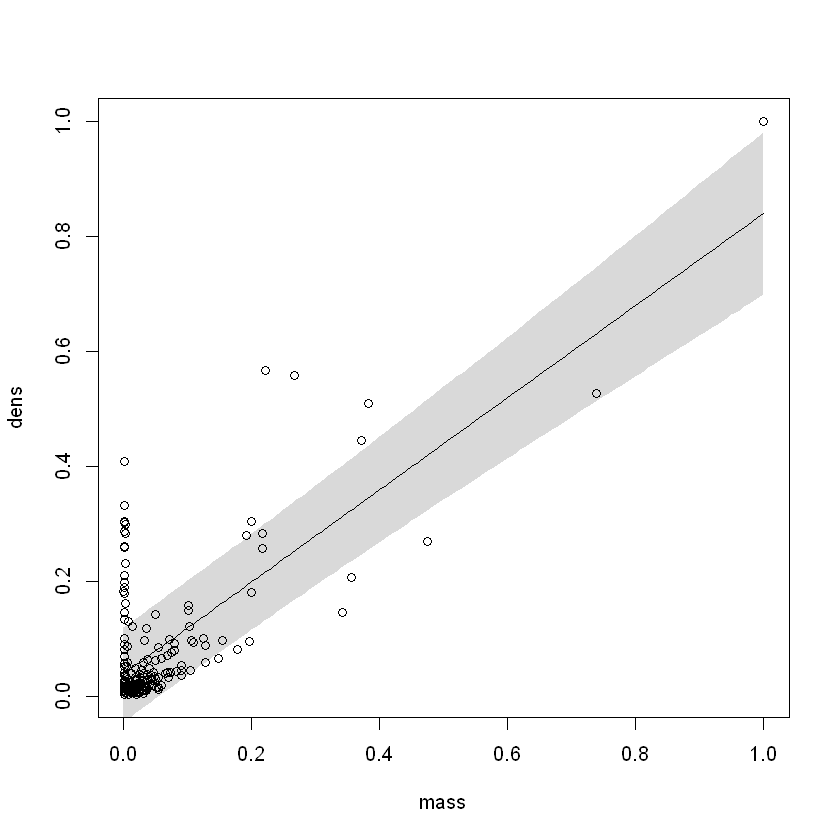

In [11]:
mass_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ mass, data = d, xlab = "mass", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model2, data = list(mass = mass_seq, planet = planet, orb = mean(d$orb)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(mass_seq, mu.mean)
shade(mu.HPDI, mass_seq)

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

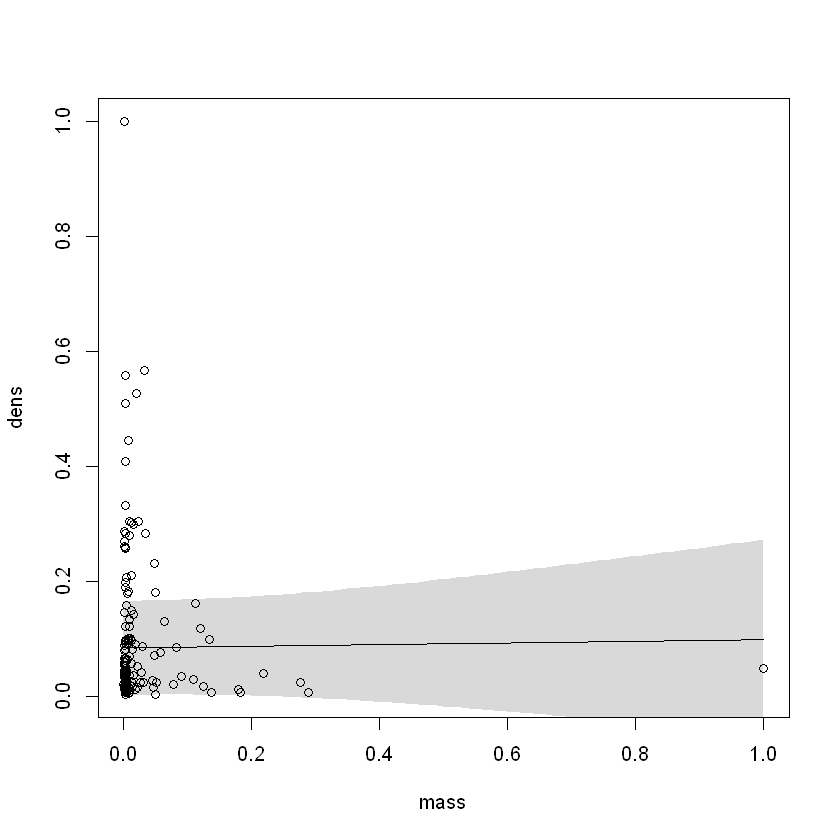

In [13]:
orb_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ orb, data = d, xlab = "orbit", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model2, data = list(orb = orb_seq, planet = planet, mass = mean(d$mass)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(orb_seq, mu.mean)
shade(mu.HPDI, orb_seq)

In [15]:
# Model with mass and radius
model3 <- map2stan(
	alist(
		dens ~ dnorm(mu, sigma),
		mu <- off + off_planet[planet] + slope_mass * mass + slope_rad * rad,
		off ~ dnorm(0, 1),
		off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		a_planet ~ dnorm(0, 1),
		sigma_planet ~ dcauchy(0, 1),
		slope_mass ~ dnorm(0, 1),
		slope_rad ~ dnorm(0, 1),
		sigma ~ dunif(0, 1)
	),
	data = d, iter = 4000, chains = 12, cores = 12
)

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2

Running MCMC with 12 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2.stan', line 26, column 4 to column 51)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2.stan', line 26, column 4 to column 51)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2.stan', line 26, column 4 to column 51)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2.stan', line 26, column 4 to column 51)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 



Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c3d6469f2.stan', line 26, column 4 to column 51)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 3 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 3 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 3 Iteration: 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"There were 611 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

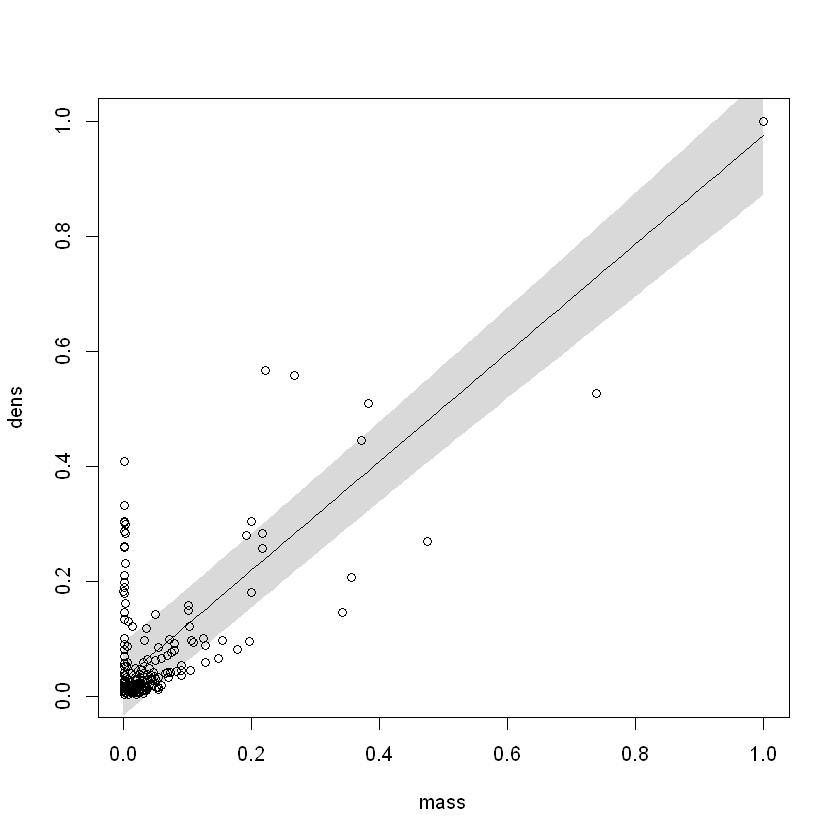

In [16]:
mass_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ mass, data = d, xlab = "mass", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model3, data = list(mass = mass_seq, planet = planet, rad = mean(d$rad)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(mass_seq, mu.mean)
shade(mu.HPDI, mass_seq)

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

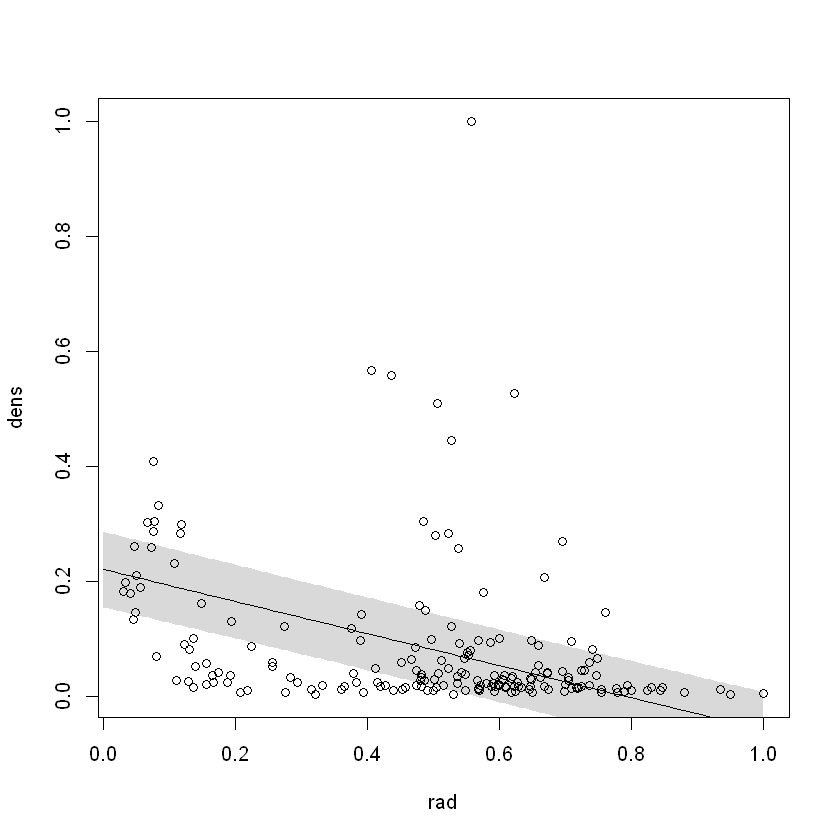

In [17]:
rad_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ rad, data = d, xlab = "rad", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model3, data = list(rad = rad_seq, planet = planet, mass = mean(d$mass)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(rad_seq, mu.mean)
shade(mu.HPDI, rad_seq)

In [24]:
# Model with mass and radius quadratic
model4 <- map2stan(
	alist(
		dens ~ dnorm(mu, sigma),
		mu <- off + off_planet[planet] + slope_mass * mass + slope_rad * rad + c_rad * rad * rad,
		off ~ dnorm(0, 1),
		off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		a_planet ~ dnorm(0, 1),
		sigma_planet ~ dcauchy(0, 1),
		slope_mass ~ dnorm(0, 1),
		slope_rad ~ dnorm(0, 1),
		c_rad ~ dnorm(0, 1),
		sigma ~ dunif(0, 1)
	),
	data = d, iter = 4000, chains = 12, cores = 12
)

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c258a7f17.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c258a7f17.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c258a7f17

Running MCMC with 12 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c258a7f17.stan', line 28, column 4 to column 51)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c258a7f17.stan', line 28, column 4 to column 51)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c258a7f17.stan', line 28, column 4 to column 51)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c258a7f17.stan', line 28, column 4 to column 51)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 



Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 5 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 6 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 6 Iteration:  

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"There were 844 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

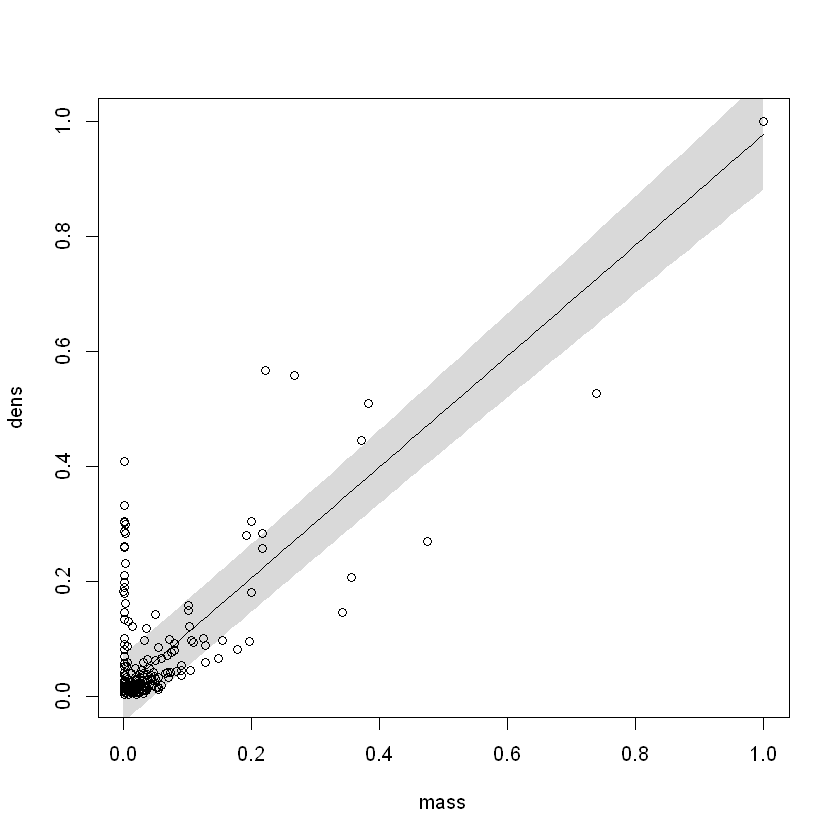

In [28]:
mass_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ mass, data = d, xlab = "mass", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model4, data = list(mass = mass_seq, planet = planet, rad = mean(d$rad)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(mass_seq, mu.mean)
shade(mu.HPDI, mass_seq)

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

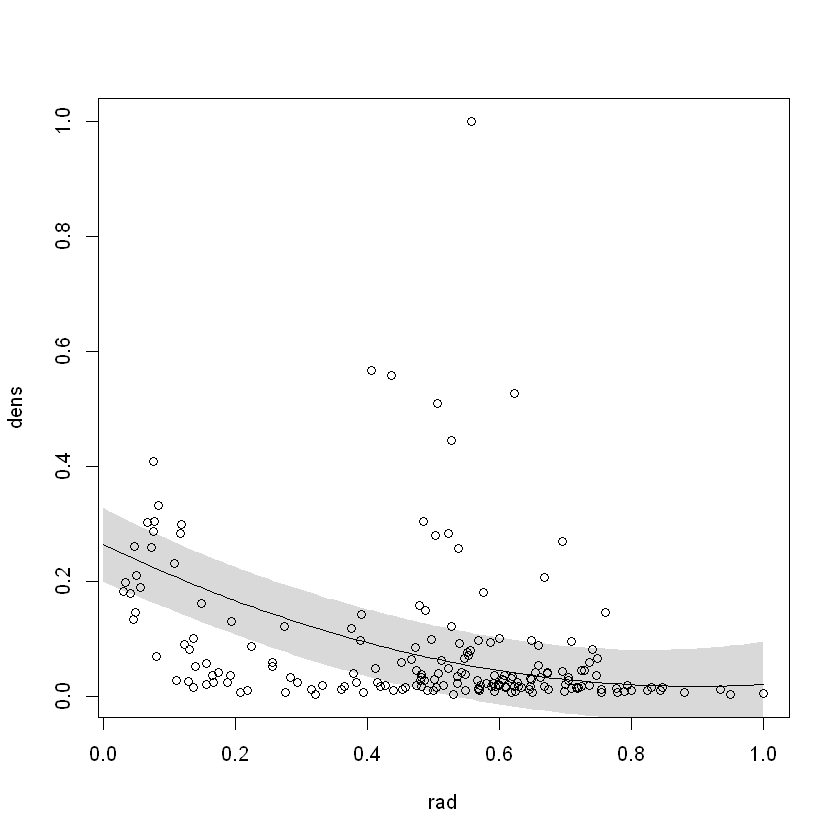

In [29]:
rad_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ rad, data = d, xlab = "rad", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model4, data = list(rad = rad_seq, planet = planet, mass = mean(d$mass)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(rad_seq, mu.mean)
shade(mu.HPDI, rad_seq)

In [30]:
# Model with mass and radius interaction
model5 <- map2stan(
	alist(
		dens ~ dnorm(mu, sigma),
		mu <- off + off_planet[planet] + slope_mass * mass + slope_rad * rad + int_mass_rad * mass * rad,
		off ~ dnorm(0, 1),
		off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		a_planet ~ dnorm(0, 1),
		sigma_planet ~ dcauchy(0, 1),
		slope_mass ~ dnorm(0, 1),
		slope_rad ~ dnorm(0, 1),
		int_mass_rad ~ dnorm(0, 1),
		sigma ~ dunif(0, 1)
	),
	data = d, iter = 4000, chains = 12, cores = 12
)

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c194741cc.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c194741cc.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c194741cc

Running MCMC with 12 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c194741cc.stan', line 28, column 4 to column 51)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c194741cc.stan', line 28, column 4 to column 51)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c194741cc.stan', line 28, column 4 to column 51)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 4 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"There were 404 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

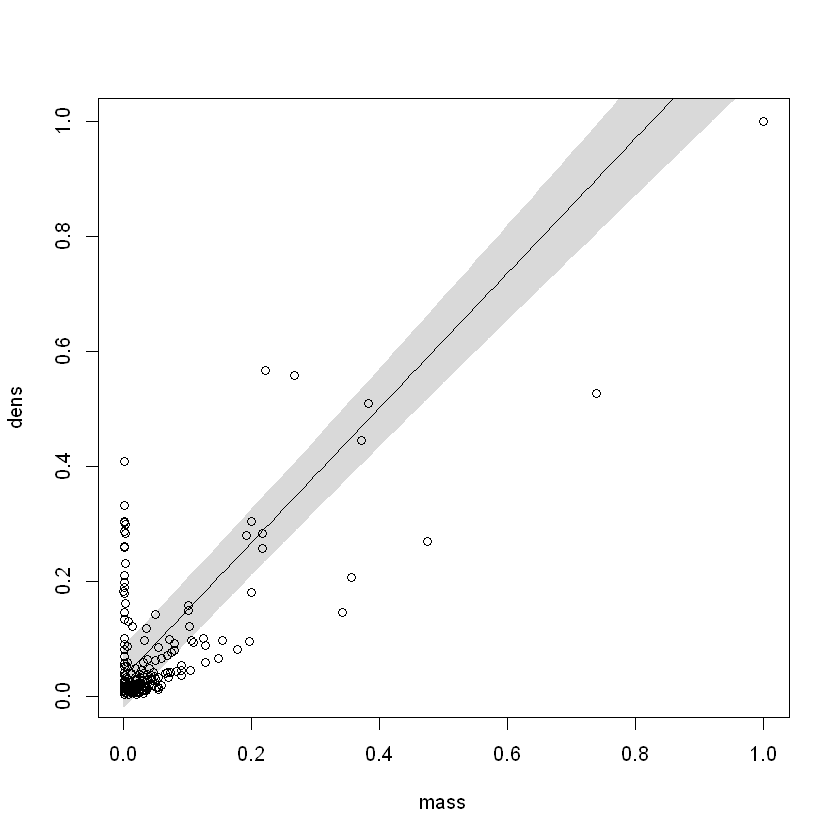

In [34]:
mass_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ mass, data = d, xlab = "mass", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model5, data = list(mass = mass_seq, planet = planet, rad = mean(d$rad)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(mass_seq, mu.mean)
shade(mu.HPDI, mass_seq)

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 /

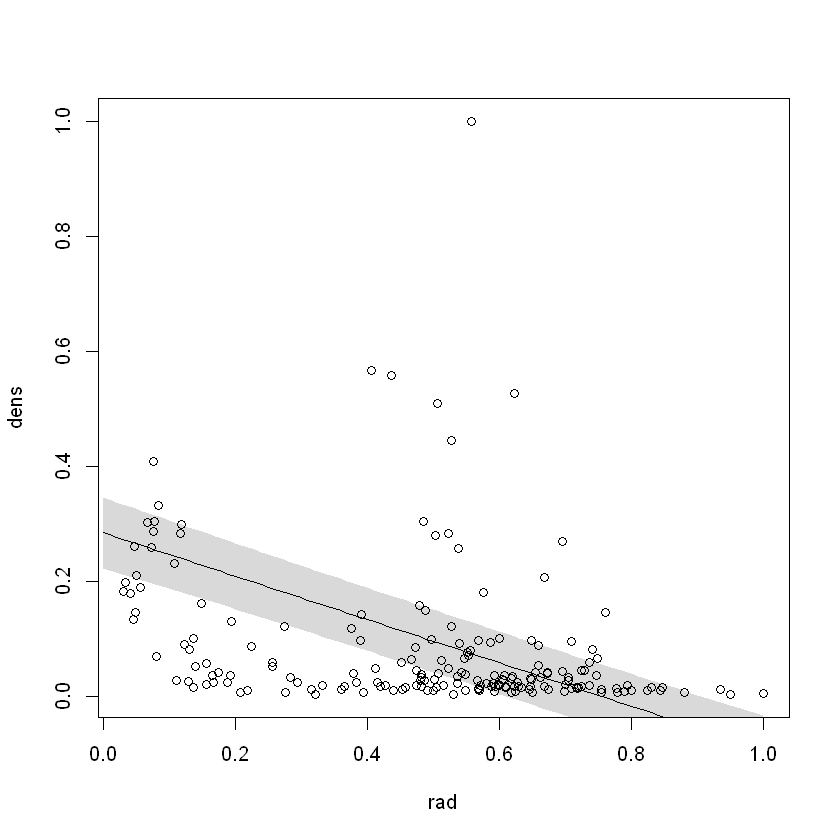

In [35]:
rad_seq <- seq(from = 0, to = 1, by = 0.01)
plot(dens ~ rad, data = d, xlab = "rad", ylab = "dens")

means <- c()
hpdi1 <- c()
hpdi2 <- c()

for (planet in 1:nrow(d)) {
	mu <- link(model5, data = list(rad = rad_seq, planet = planet, mass = mean(d$mass)))
	mu.mean <- apply(mu, 2, mean)
	mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)
	means <- append(means, mu.mean)
	hpdi1 <- append(hpdi1, mu.HPDI[1, ])
	hpdi2 <- append(hpdi2, mu.HPDI[2, ])
}

mu.mean <- apply(matrix(means, nrow = nrow(d), byrow = TRUE), 2, mean)
mu.HPDI <- c(apply(matrix(hpdi1, nrow = nrow(d), byrow = TRUE), 2, mean), apply(matrix(hpdi2, nrow = nrow(d), byrow = TRUE), 2, mean))
mu.HPDI <- matrix(mu.HPDI, nrow = 2, byrow = TRUE)
lines(rad_seq, mu.mean)
shade(mu.HPDI, rad_seq)

We considered five different models and incluced the radius of the observed planet with and without interaction. The interaction model outperformed any other we constructed, although there might still be better models to be found.

In [36]:
# Interaction models with less restrictive priors
model6 <- map2stan(
	alist(
		dens ~ dnorm(mu, sigma),
		mu <- off + off_planet[planet] + slope_mass * mass + slope_rad * rad + int_mass_rad * mass * rad,
		off ~ dnorm(0, 10),
		off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		a_planet ~ dnorm(0, 10),
		sigma_planet ~ dcauchy(0, 10),
		slope_mass ~ dnorm(0, 10),
		slope_rad ~ dnorm(0, 10),
		int_mass_rad ~ dnorm(0, 10),
		sigma ~ dunif(0, 10)
	),
	data = d, iter = 4000, chains = 12, cores = 12
)

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1

Running MCMC with 12 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 33, column 4 to column 32)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 33, column 4 to column 32)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 33, column 4 to column 32)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 33, column 4 to column 32)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 



Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 33, column 4 to column 32)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 



Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpeYzx3H/model-61c457754d1.stan', line 28, column 4 to column 51)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 5 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration: 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(dens ~ dnorm(mu, sigma), mu <- off + off_planet[planet] + :
"There were 379 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [37]:
compare(model1, model2, model3, model4, model5, model6)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model5,-574.9078,48.39981,0.00000,NA,159.5655,9.998517e-01
model6,-557.1465,50.42955,17.76130,7.742907,141.2227,1.390331e-04
model4,-551.7332,65.10449,23.17460,47.344364,204.7604,9.281885e-06
model3,-504.5480,48.32149,70.35984,29.428864,123.3228,5.266127e-16
model2,-450.1903,44.13616,124.71749,18.372077,212.2298,8.277055e-28
model1,-405.3354,41.44148,169.57239,19.029993,139.6096,1.505774e-37
